<div style="background-color:#FFEB9C;padding:10px;border-radius:5px;font-size:3em;">
LCA with Python
</div>

**Min Gyu Song / 송민규**  
**TUM Sustainable Resource Management**  

**E:** mg.song@tum.de  
**T:** +49 172-8396051  

<div style="background-color:#f5f5f5;padding:10px;border-radius:5px;">

### Table of Contents

1. **Setup of Project**
2. **LCI inventory**
   - (1) Choosing an activity
   - (2) Check for the exchanges
   - (3) Choose Method
3. **Performing the LCA**
   - (1) Access the Database and Select an Activity
   - (2) Define the Method and Print Selection
   - (3) Perform LCA and Display Results
4. **Contribution Analysis and Visualization**

</div>


<div style="background-color:#FFEB8D;padding:5px;border-radius:5px;font-size:1em;">

# 1. Setup of Project

</div>

In [6]:
# import the packages
import bw2data as bd # the data handling brightway package
import bw2io as bi # the data input out package, used to import ecoinvent
import bw2calc as bc # the package that does the math
import bw2analyzer as bwa # used for the iterative calculations

# Impport basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Sets current project to ei import, to have access to de Databases
bd.projects.set_current('ei import')
bd.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.9.1 cutoff

In [8]:
# Creates variable for the database
eidb=bd.Database('ecoinvent 3.9.1 cutoff')

<div style="background-color:#FFEB9D;padding:5px;border-radius:5px;font-size:1em;">

# 2. LCI Inventory

</div>

## (1) Choosing an activity

In [11]:
#Search for your activity
# Input for name
input_name = input("Enter the activity name: ")

# Searching for the activity
found_activities = [act for act in eidb if input_name.lower() in act['name'].lower()]

# Displaying the result
if found_activities:
    for act in found_activities:
        print(f"Found activity: {act['name']} in {act['location']}")
else:
    print("No matching activity found in the database.")

Enter the activity name:  market for printer, laser


Found activity: market for printer, laser, black/white in GLO
Found activity: market for printer, laser, colour in GLO


In [15]:
# For addiotinal information, the as_dict command is used
act2=[act for act in eidb if 
      act['name'] == 'market for printer, laser, black/white' and 
      act['location']=='GLO']
# Our loop returns a list with 1 element. To facilitate further operations, we take the element instead of the whole
# list object
act2=act2[0]

import pprint

# Assuming act2.as_dict() gives you the dictionary
activity_dict = act2.as_dict()

# Using pprint to display the dictionary
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(activity_dict)

{   'activity': 'eecf547e-9b7d-589c-874b-b971c81d4ccd',
    'activity type': 'market activity',
    'authors': {   'data entry': {   'email': 'bourgault@ecoinvent.org',
                                     'name': 'Guillaume Bourgault'},
                   'data generator': {   'email': 'support@ecoinvent.org',
                                         'name': '[System]'}},
    'classifications': [   ('EcoSpold01Categories', 'electronics/devices'),
                           (   'ISIC rev.4 ecoinvent',
                               '2620:Manufacture of computers and peripheral '
                               'equipment'),
                           (   'CPC',
                               '45264: Laser printers used with data '
                               'processing machines')],
    'code': '35be3df51e4bd0eba8eb514b2d25f49c',
    'comment': 'This is a market activity. Each market represents the '
               'consumption mix of a product in a given geography, connecting '
    

## (2) Check for the Exchanges

The Exchanges of this activity are presented here. From the DataFrame output it can be seen, that the reference unit is 1kg of tomatoes. This will be the reference unit of the LCA.

In [24]:
# Allows us to see the exchanges of our activity

# This line allows the viewing of every row in a Dataframe
pd.set_option('display.max_rows',None)
# The exchanges are saved in a DataFrame for a more organized Visualization
exc_unt=pd.DataFrame(act2.exchanges())
# A new DataFrame with only the interesting columns is made. This is done to make the output more organized
exc=exc_unt.filter(['name','amount','unit','location','type'],axis=1)
# Sorts the DataFrame 'exc' by the 'amount' column in descending order
sorted_exc = exc.sort_values(by='type', ascending=False)
sorted_exc

,name,amount,unit,type
1,"printer, laser, black/white",1.0000,unit,technosphere
2,"transport, freight train",0.1530,ton kilometer,technosphere
3,"transport, freight, light commercial vehicle",0.0960,ton kilometer,technosphere
4,"transport, freight, lorry, unspecified",3.0948,ton kilometer,technosphere
5,"transport, freight, sea, container ship",6.6720,ton kilometer,technosphere
0,"printer, laser, black/white",1.0000,unit,production


## (3) Choose a method


In [43]:
methods = bd.methods
print(methods)
# Requesting a single input from the user
user_input = input("Enter a keyword to search for methods: ")

# Finding methods in the database based on the input received
matched_methods = [m for m in methods if user_input.lower() in str(m).lower()]

# Printing all matched methods
if matched_methods:
    print("Found methods:")
    for method in matched_methods:
        print(method)
else:
    print("No matching methods found.")

selected_method = 'IPCC 2021', 'climate change', 'global warming potential (GWP100)'

Methods dictionary with 762 objects, including:
	('CML v4.8 2016', 'acidification', 'acidification (incl. fate, average Europe total, A&B)')
	('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
	('CML v4.8 2016', 'ecotoxicity: freshwater', 'freshwater aquatic ecotoxicity (FAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: marine', 'marine aquatic ecotoxicity (MAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: terrestrial', 'terrestrial ecotoxicity (TETP inf)')
	('CML v4.8 2016', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')
	('CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)')
	('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)')
	('CML v4.8 2016', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)')
	('CML v4.8 2016', 'ozone depletion', 'ozone layer depletion (ODP steady state)')
Use `list(this object)` to get the complete list.


Enter a keyword to search for methods:  IPCC 2021', 'climate change', 'global warming potential (GWP100)


Found methods:
('IPCC 2021', 'climate change', 'global warming potential (GWP100)')



<div style="background-color:#FFEB9D;padding:5px;border-radius:5px;font-size:1em;">

# 3. Performing the LCA

</div>

- Using the Brightway2 framework for LCA calculation
- Python package for LCA.

In [38]:
# Perform lca
lca = bc.LCA({act2:1},selected_method)
lca.lci()
lca.lcia()

In [40]:
# Prints the result of out LCA
print("The {} process accounts for {:f} {}.".format(
    act2['name'],
    lca.score,
    bd.methods.get(selected_method).get('unit')
    ))

The market for printer, laser, black/white process accounts for 63.325449 kg CO2-Eq.



<div style="background-color:#FFEB9D;padding:5px;border-radius:5px;font-size:1em;">

# 4. Contribution Analysis

</div>

In [41]:
import bw2analyzer as bwa
Result_CA = bwa.utils.print_recursive_supply_chain(act2, max_level=2)

1: 'market for printer, laser, black/white' (unit, GLO, None)
  1: 'printer production, laser, black/white' (unit, GLO, None)
    0.00637: 'market for aluminium, cast alloy' (kilogram, GLO, None)
    0.0135: 'market for aluminium, wrought alloy' (kilogram, GLO, None)
    1.8: 'market for cable, connector for computer, without plugs' (meter, GLO, None)
    1.8: 'market for cable, printer cable, without plugs' (meter, GLO, None)
    0.208: 'market for copper, cathode' (kilogram, GLO, None)
    0.306: 'market for corrugated board box' (kilogram, US, None)
    0.0114: 'market for corrugated board box' (kilogram, CA-QC, None)
    0.278: 'market for corrugated board box' (kilogram, RER, None)
    0.709: 'market for corrugated board box' (kilogram, RoW, None)
    1.67: 'market group for electricity, medium voltage' (kilowatt hour, GLO, None)
    0.0167: 'market for epoxy resin, liquid' (kilogram, RoW, None)
    0.00351: 'market for epoxy resin, liquid' (kilogram, RER, None)
    0.00119: 'mark

In [51]:
# The same recursive calculation is done, but it is now transformed into a DataFrame.
contribution = bwa.utils.recursive_calculation_to_object(act2, max_level=2, 
                                                         lcia_method=selected_method)
contribution_df=pd.DataFrame(contribution)
# DataFrame is sorted by descending fraction value.
sorted_df=contribution_df.sort_values(by='fraction',ascending = False)
# Here we create a list with the fractions of the contributions of the
# first level of the supply chain. This is done for a graph shown later
l1_fr=[]
l1_nam=[]
# Iterrows allows to iterate the rows of the data frame
for index, row in sorted_df.iterrows():
    if row['parent'] == 'root': # Parent will be root if and only if row is on first level of supply chain
        l1_fr.append(row['fraction'])
        l1_nam.append(row['name'])

sorted_df

,label,parent,score,fraction,amount,name,key
0,root,None,63.325449,1.000000,1.00000,"market for printer, laser, black/white","(ecoinvent 3.9.1 cutoff, 35be3df51e4bd0eba8eb5..."
1,root_a,root,62.596602,0.988490,1.00000,"printer production, laser, black/white","(ecoinvent 3.9.1 cutoff, 3aaa763f7222f3475e0f0..."
13,root_a_ag,root_a,14.029831,0.221551,1.00000,"market for toner module, laser printer, black/...","(ecoinvent 3.9.1 cutoff, c122f81a86b251ca2e56c..."
11,root_a_x,root_a,10.549838,0.166597,2.83000,"market for polystyrene, high impact","(ecoinvent 3.9.1 cutoff, d2bab273eb4b2cfebda5e..."
14,root_a_ah,root_a,10.338511,0.163260,-5.87000,"market for used printer, laser","(ecoinvent 3.9.1 cutoff, aadc462cbab20d2b9314e..."
12,root_a_ab,root_a,6.701627,0.105828,1.28600,"market for steel, chromium steel 18/8, hot rolled","(ecoinvent 3.9.1 cutoff, 683f869780ee789d92d3b..."
9,root_a_q,root_a,5.563759,0.087860,0.07740,"market for magnesium-alloy, AZ91, diecast","(ecoinvent 3.9.1 cutoff, f770ed86e91a27cead508..."
7,root_a_o,root_a,3.641537,0.057505,2.86730,market for injection moulding,"(ecoinvent 3.9.1 cutoff, aa13f7b5407a0e336d8d2..."
8,root_a_p,root_a,2.160811,0.034122,0.07740,market for magnesium,"(ecoinvent 3.9.1 cutoff, 4c28de4114cc15a555d2c..."
4,root_a_e,root_a,1.428503,0.022558,0.20810,"market for copper, cathode","(ecoinvent 3.9.1 cutoff, 8b62f30ed586a5f23611e..."


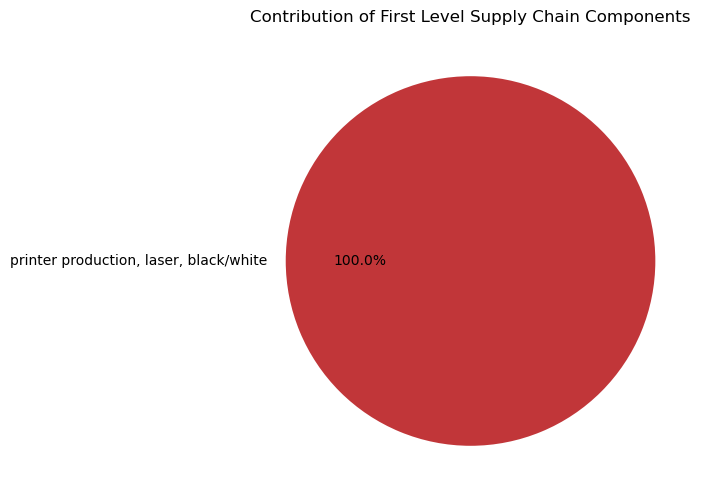

In [52]:
data = {
    'Name': l1_nam,
    'Fraction': l1_fr
}
df = pd.DataFrame(data)

# 원 그래프 그리기
plt.figure(figsize=(10, 6))
plt.pie(df['Fraction'], labels = df['Name'], autopct='%1.1f%%')
plt.title('Contribution of First Level Supply Chain Components')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

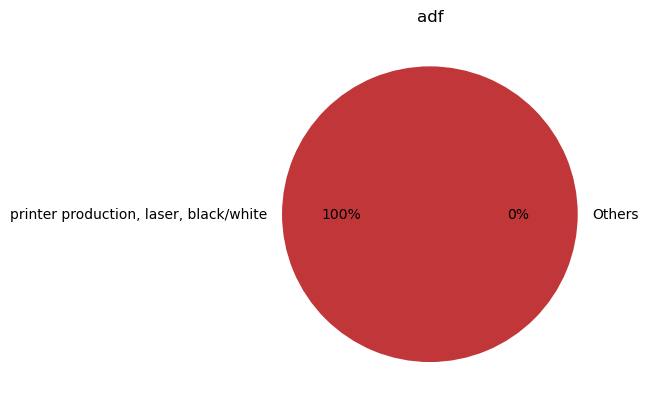

In [49]:
l1_fr_Plot=l1_fr[0:5] # We take the first 5 values, which are the biggest contributors
l1_fr_Plot.append(sum(l1_fr[5:-1])) # The other values are appended into a single element
# of our graph to avoid clutering

l1_nam_Plot=l1_nam[0:5] # We do the same for our names list
l1_nam_Plot.append('Others')

# We set the palette with the seaborn library and make a pie plot. It is done directly with 
# matplotlib so that it can be done with lists.
sns.set_palette('RdBu')
plt.pie(l1_fr_Plot, labels=l1_nam_Plot,autopct='%.0f%%')
plt.title('adf')
plt.show